![](img/511_banner.png)

# Lecture 8: Advanced data wrangling with Pandas

**Arman Seyed-Ahmadi, October 2021**

## Lecture outline

- [Working with strings](#Working-with-strings)
- [Working with datetimes](#Working-with-datetimes)
- [Hierarchical indexing (OPTIONAL)](Hierarchical-indexing-(OPTIONAL))
- [Visualizing DataFrames](#Visualizing-DataFrames)
- [Pandas profiling](#Pandas-profiling)

## Lecture learning objectives

- Manipulate strings in Pandas by accessing methods from the `Series.str` attribute.
- Understand how to use regular expressions in Pandas for wrangling strings.
- Differentiate between datetime object in Pandas such as `Timestamp`, `Timedelta`, `Period`, `DateOffset`.
- Create these datetime objects with functions like `pd.Timestamp()`, `pd.Period()`, `pd.date_range()`, `pd.period_range()`.
- Index a datetime index with partial string indexing.
- Perform basic datetime operations like splitting a datetime into constituent parts (e.g., `year`, `weekday`, `second`, etc), apply offsets, change timezones, and resample with `.resample()`.
- Make basic plots in Pandas by accessing the `.plot` attribute or importing functions from `pandas.plotting`.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 20)

## Working with strings
---

- Working with text data is quite common in data science
- Luckily, Pandas Series and Index objects are equipped with a set of string processing methods which we'll explore here

### String dtype

- As we discussed back in Lecture 6, string data is represented in pandas using the `object` dtype, which is a generic dtype for representing mixed data or data of unknown size
- It would be better to have a dedicated dtype and Pandas has recently introduced this: the `StringDtype`
- `object` remains the default dtype for strings however, as Pandas looks to continue testing and improving the `string` dtype
- You can read more about the `StringDtype` in the [Pandas documentation here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types)

### String methods

- In previous lectures, we've seen how libraries like NumPy and Pandas can vectorize operations for increased speed and usability

In [2]:
x = np.array([1, 2, 3, 4, 5])
x * 2

array([ 2,  4,  6,  8, 10])

- This is not the case for arrays of strings however

In [3]:
x = np.array(['Arman', 'Florencia', 'Quan', 'Mike', 'Tiffany', 'Joel', 'Varada'])
x.upper()

AttributeError: 'numpy.ndarray' object has no attribute 'upper'

- Instead, you would have to operate on each string object one at a time, using a loop for example:

In [4]:
[name.upper() for name in x]

['ARMAN', 'FLORENCIA', 'QUAN', 'MIKE', 'TIFFANY', 'JOEL', 'VARADA']

- Pandas addresses this by vectorizing its string methods and handling missing values
- String methods can be accessed by the `.str` attribute of Pandas `Series` and `Index` objects
- Pretty much all built-in string operations (e.g. `.upper()`, `.lower()`, `.split()`) and more are available

In [5]:
s = pd.Series(x)
s

0        Arman
1    Florencia
2         Quan
3         Mike
4      Tiffany
5         Joel
6       Varada
dtype: object

In [7]:
s.str.upper()

0        ARMAN
1    FLORENCIA
2         QUAN
3         MIKE
4      TIFFANY
5         JOEL
6       VARADA
dtype: object

In [8]:
s.str.split('i', expand=True)

0      1
0    Arman   None
1  Florenc      a
2     Quan   None
3        M     ke
4        T  ffany
5     Joel   None
6   Varada   None

In [9]:
s.str.len()

0    5
1    9
2    4
3    4
4    7
5    4
6    6
dtype: int64

- We can index each string too, just like any other string in Python:

In [16]:
s.str[-1]

0    n
1    a
2    n
3    e
4    y
5    l
6    a
dtype: object

- As mentioned, we can also operate on Index objects (i.e., index or column labels)

In [18]:
df = pd.DataFrame(
    np.random.rand(5, 3),
    columns=['Measured Feature', 'recorded feature', 'PredictedFeature'],
    index=[f'ROW{_}' for _ in range(5)],
)
df

Measured Feature  recorded feature  PredictedFeature
ROW0          0.693038          0.104149          0.127245
ROW1          0.645282          0.796967          0.571759
ROW2          0.300805          0.231145          0.796234
ROW3          0.703433          0.043262          0.564761
ROW4          0.994929          0.211062          0.475169

In [19]:
type(df.columns)

pandas.core.indexes.base.Index

- Let's clean up those labels by:
    1. Removing the word "feature" and "Feature"
    2. Lowercase the "ROW" and add an underscore between the digit and letters

In [20]:
df.columns = df.columns.str.capitalize().str.replace('feature', '').str.strip()

In [21]:
df.index = df.index.str.lower().str.replace('w', 'w_')

In [22]:
df

Measured  Recorded  Predicted
row_0  0.693038  0.104149   0.127245
row_1  0.645282  0.796967   0.571759
row_2  0.300805  0.231145   0.796234
row_3  0.703433  0.043262   0.564761
row_4  0.994929  0.211062   0.475169

- Great that worked!
- There are so many string operations you can use in Pandas
- Here's a full list of all the string methods available in Pandas that I pulled from the documentation

| Method                     | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `Series.str.cat`           | Concatenate strings                                                                                                               |
| `Series.str.split`         | Split strings on delimiter                                                                                                        |
| `Series.str.rsplit`        | Split strings on delimiter working from the end of the string                                                                     |
| `Series.str.get`           | Index into each element (retrieve i-th element)                                                                                   |
| `Series.str.join`          | Join strings in each element of the Series with passed separator                                                                  |
| `Series.str.get_dummies`   | Split strings on the delimiter returning DataFrame of dummy variables                                                             |
| `Series.str.contains`      | Return boolean array if each string contains pattern/regex                                                                        |
| `Series.str.replace`       | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence         |
| `Series.str.repeat`        | Duplicate values (`s.str.repeat(3)` equivalent to `x * 3`)                                                                        |
| `Series.str.pad`           | "Add whitespace to left, right, or both sides of strings"                                                                         |
| `Series.str.center`        | Equivalent to `str.center`                                                                                                        |
| `Series.str.ljust`         | Equivalent to `str.ljust`                                                                                                         |
| `Series.str.rjust`         | Equivalent to `str.rjust`                                                                                                         |
| `Series.str.zfill`         | Equivalent to `str.zfill`                                                                                                         |
| `Series.str.wrap`          | Split long strings into lines with length less than a given width                                                                 |
| `Series.str.slice`         | Slice each string in the Series                                                                                                   |
| `Series.str.slice_replace` | Replace slice in each string with passed value                                                                                    |
| `Series.str.count`         | Count occurrences of pattern                                                                                                      |
| `Series.str.startswith`    | Equivalent to `str.startswith(pat)` for each element                                                                              |
| `Series.str.endswith`      | Equivalent to `str.endswith(pat)` for each element                                                                                |
| `Series.str.findall`       | Compute list of all occurrences of pattern/regex for each string                                                                  |
| `Series.str.match`         | "Call `re.match` on each element, returning matched groups as list"                                                               |
| `Series.str.extract`       | "Call `re.search` on each element, returning DataFrame with one row for each element and one column for each regex capture group" |
| `Series.str.extractall`    | "Call `re.findall` on each element, returning DataFrame with one row for each match and one column for each regex capture group"  |
| `Series.str.len`           | Compute string lengths                                                                                                            |
| `Series.str.strip`         | Equivalent to `str.strip`                                                                                                         |
| `Series.str.rstrip`        | Equivalent to `str.rstrip`                                                                                                        |
| `Series.str.lstrip`        | Equivalent to `str.lstrip`                                                                                                        |
| `Series.str.partition`     | Equivalent to `str.partition`                                                                                                     |
| `Series.str.rpartition`    | Equivalent to `str.rpartition`                                                                                                    |
| `Series.str.lower`         | Equivalent to `str.lower`                                                                                                         |
| `Series.str.casefold`      | Equivalent to `str.casefold`                                                                                                      |
| `Series.str.upper`         | Equivalent to `str.upper`                                                                                                         |
| `Series.str.find`          | Equivalent to `str.find`                                                                                                          |
| `Series.str.rfind`         | Equivalent to `str.rfind`                                                                                                         |
| `Series.str.index`         | Equivalent to `str.index`                                                                                                         |
| `Series.str.rindex`        | Equivalent to `str.rindex`                                                                                                        |
| `Series.str.capitalize`    | Equivalent to `str.capitalize`                                                                                                    |
| `Series.str.swapcase`      | Equivalent to `str.swapcase`                                                                                                      |
| `Series.str.normalize`     | Return Unicode normal form. Equivalent to `unicodedata.normalize`                                                                 |
| `Series.str.translate`     | Equivalent to `str.translate`                                                                                                     |
| `Series.str.isalnum`       | Equivalent to `str.isalnum`                                                                                                       |
| `Series.str.isalpha`       | Equivalent to `str.isalpha`                                                                                                       |
| `Series.str.isdigit`       | Equivalent to `str.isdigit`                                                                                                       |
| `Series.str.isspace`       | Equivalent to `str.isspace`                                                                                                       |
| `Series.str.islower`       | Equivalent to `str.islower`                                                                                                       |
| `Series.str.isupper`       | Equivalent to `str.isupper`                                                                                                       |
| `Series.str.istitle`       | Equivalent to `str.istitle`                                                                                                       |
| `Series.str.isnumeric`     | Equivalent to `str.isnumeric`                                                                                                     |
| `Series.str.isdecimal`     | Equivalent to `str.isdecimal`                                                                                                     |

- I often use the dataframe method `df.replace()` to do string replacements:

In [24]:
df = pd.DataFrame({'col1': ['replace me', 'b', 'c', 'd'],
                   'col2': [1, 9999, 3, 'replace me']})
df

col1        col2
0  replace me           1
1           b        9999
2           c           3
3           d  replace me

In [25]:
df.replace({'replace me': 'Replaced!',
            9999: 10000})

col1       col2
0  Replaced!          1
1          b      10000
2          c          3
3          d  Replaced!

### Regular expressions or REGEX

- A regular expression (regex) is a sequence of characters that defines a search pattern
- For more complex string operations, you'll definitely want to use regex
- You're learning more about regex in DSCI 521 but I'll revise them briefly here
- [Here's a great cheatsheet](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285) of regular expression syntax
- I am not a regex expert. I usually jump over to [RegExr.com](https://regexr.com/) and play around until I find the expression I want
- Many Pandas string functions accept regular expressions as input, these are the ones I see most often:

|Method|Description|
|---|---|
|`match()`   |Call `re.match()` on each element, returning a boolean.
|`extract()` |Call `re.match()` on each element, returning matched groups as strings.
|`findall()` |Call `re.findall()` on each element
|`replace()` |Replace occurrences of pattern with some other string
|`contains()`|Call `re.search()` on each element, returning a boolean
|`count()`   |Count occurrences of pattern
|`split()`   |Equivalent to `str.split()`, but accepts regexps
|`rsplit()`  |Equivalent to `str.rsplit()`, but accepts regexps

- For example, we can easily find all names in our Series that start and end with a consonant

In [26]:
s = pd.Series(['Arman', 'Florencia', None, 'Quan', 'Mike', 'Tiffany', 'Joel', 'Varada'])
s

0        Arman
1    Florencia
2         None
3         Quan
4         Mike
5      Tiffany
6         Joel
7       Varada
dtype: object

In [33]:
s.str.findall(r'^[^AEIOU].*[^aeiou]$')

0           []
1           []
2         None
3       [Quan]
4           []
5    [Tiffany]
6       [Joel]
7           []
dtype: object

- Let's break down that regex:

|Part|Description|
|---|---|
|`^`|Specifies the start of a string|
|`[^AEIOU]`|Square brackets match a single character. When `^` is used inside square brackets it means "not", so we are are saying, "the first character of the string should not be A, E, I, O, or U (i.e., a vowel)"|
|`.*`|`.` matches any character and `*` means "0 or more time", this is basically saying that we can have any number of characters in the middle of our string|
|`[^aeiou]$`| `$` matches the end of the string, so we are saying, we don't want the last character to be a lowercase vowel|

- Regex can do some truly magical things, so keep it in mind when you're doing complicated text wrangling
- Let's see one more example on the IMDB dataset:

In [34]:
df = pd.read_csv('data/IMDB.csv')
df

Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A  142 min   
1               The Godfather           1972           A  175 min   
2             The Dark Knight           2008          UA  152 min   
3      The Godfather: Part II           1974           A  202 min   
4                12 Angry Men           1957           U   96 min   
..                        ...            ...         ...      ...   
995    Breakfast at Tiffany's           1961           A  115 min   
996                     Giant           1956           G  201 min   
997     From Here to Eternity           1953      Passed  118 min   
998                  Lifeboat           1944         NaN   97 min   
999              The 39 Steps           1935         NaN   86 min   

                        Genre  IMDB_Rating  Meta_score              Director  \
0                       Drama          9.3        80.0        Frank Darabont   
1                Crime, Drama          9.2       100.0  Francis Ford Coppola   
2        Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3                Crime, Drama          9.0        90.0  Francis Ford Coppola   
4                Crime, Drama          9.0        96.0          Sidney Lumet   
..                        ...          ...         ...                   ...   
995    Comedy, Drama, Romance          7.6        76.0         Blake Edwards   
996            Drama, Western          7.6        84.0        George Stevens   
997       Drama, Romance, War          7.6        85.0        Fred Zinnemann   
998                Drama, War          7.6        78.0      Alfred Hitchcock   
999  Crime, Mystery, Thriller          7.6        93.0      Alfred Hitchcock   

                 Star1              Star2           Star3           Star4  \
0          Tim Robbins     Morgan Freeman      Bob Gunton  William Sadler   
1        Marlon Brando          Al Pacino      James Caan    Diane Keaton   
2       Christian Bale       Heath Ledger   Aaron Eckhart   Michael Caine   
3            Al Pacino     Robert De Niro   Robert Duvall    Diane Keaton   
4          Henry Fonda        Lee J. Cobb   Martin Balsam    John Fiedler   
..                 ...                ...             ...             ...   
995     Audrey Hepburn     George Peppard   Patricia Neal     Buddy Ebsen   
996   Elizabeth Taylor        Rock Hudson      James Dean   Carroll Baker   
997     Burt Lancaster   Montgomery Clift    Deborah Kerr      Donna Reed   
998  Tallulah Bankhead        John Hodiak   Walter Slezak  William Bendix   
999       Robert Donat  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle   

     No_of_Votes        Gross  
0        2343110   28341469.0  
1        1620367  134966411.0  
2        2303232  534858444.0  
3        1129952   57300000.0  
4         689845    4360000.0  
..           ...          ...  
995       166544          NaN  
996        34075          NaN  
997        43374   30500000.0  
998        26471          NaN  
999        51853          NaN  

[1000 rows x 14 columns]

- We could find all movies whose whose title begins with a number:

In [35]:
df['Series_Title'].str.match('^\d')

0      False
1      False
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Series_Title, Length: 1000, dtype: bool

In [36]:
df.loc[df['Series_Title'].str.match('^\d')]

Series_Title  Released_Year Certificate  Runtime  \
4                     12 Angry Men           1957           U   96 min   
64                        3 Idiots           2009          UA  170 min   
84                            1917           2019           R  119 min   
114          2001: A Space Odyssey           1968           U  149 min   
215               12 Years a Slave           2013           A  134 min   
432                             8½           1963         NaN  138 min   
492  4 luni, 3 saptamâni si 2 zile           2007         NaN  113 min   
774                   3:10 to Yuma           2007           A  122 min   
907                          50/50           2011           R  100 min   
928                            300           2006           A  117 min   
938                       21 Grams           2003          UA  124 min   
941                      25th Hour           2002           R  135 min   
943               28 Days Later...           2002           A  113 min   

                         Genre  IMDB_Rating  Meta_score  \
4                 Crime, Drama          9.0        96.0   
64               Comedy, Drama          8.4        67.0   
84        Drama, Thriller, War          8.3        78.0   
114          Adventure, Sci-Fi          8.3        84.0   
215  Biography, Drama, History          8.1        96.0   
432                      Drama          8.0        91.0   
492                      Drama          7.9        97.0   
774       Action, Crime, Drama          7.7        76.0   
907     Comedy, Drama, Romance          7.6        72.0   
928              Action, Drama          7.6        52.0   
938     Crime, Drama, Thriller          7.6        70.0   
941                      Drama          7.6        68.0   
943      Drama, Horror, Sci-Fi          7.6        73.0   

                  Director                 Star1                     Star2  \
4             Sidney Lumet           Henry Fonda               Lee J. Cobb   
64         Rajkumar Hirani            Aamir Khan                  Madhavan   
84              Sam Mendes  Dean-Charles Chapman             George MacKay   
114        Stanley Kubrick           Keir Dullea             Gary Lockwood   
215          Steve McQueen      Chiwetel Ejiofor  Michael Kenneth Williams   
432       Federico Fellini  Marcello Mastroianni               Anouk Aimée   
492        Cristian Mungiu      Anamaria Marinca             Laura Vasiliu   
774          James Mangold         Russell Crowe            Christian Bale   
907        Jonathan Levine  Joseph Gordon-Levitt                Seth Rogen   
928            Zack Snyder         Gerard Butler               Lena Headey   
938  Alejandro G. Iñárritu             Sean Penn          Benicio Del Toro   
941              Spike Lee         Edward Norton              Barry Pepper   
943            Danny Boyle        Cillian Murphy             Naomie Harris   

                      Star3                Star4  No_of_Votes        Gross  
4             Martin Balsam         John Fiedler       689845    4360000.0  
64               Mona Singh        Sharman Joshi       344445    6532908.0  
84              Daniel Mays          Colin Firth       425844  159227644.0  
114       William Sylvester       Daniel Richter       603517   56954992.0  
215      Michael Fassbender            Brad Pitt       640533   56671993.0  
432       Claudia Cardinale          Sandra Milo       108844      50690.0  
492             Vlad Ivanov   Alexandru Potocean        56625    1185783.0  
774              Ben Foster         Logan Lerman       288797   53606916.0  
907           Anna Kendrick  Bryce Dallas Howard       315426   35014192.0  
928            David Wenham         Dominic West       732876  210614939.0  
938             Naomi Watts         Danny Huston       224545   16290476.0  
941  Philip Seymour Hoffman       Rosario Dawson       169708   13060843.0  
943   Christopher Eccleston          Alex Palmer       376853   

- If we want to find all movies directed by either Christopher Nolan or James Cameron:

In [37]:
df.loc[df['Director'].str.contains('[Nn]olan$|[Cc]ameron$')]

Series_Title  Released_Year Certificate  Runtime  \
2               The Dark Knight           2008          UA  152 min   
8                     Inception           3010          UA  148 min   
21                 Interstellar           2014          UA  169 min   
36                 The Prestige           2006           U  130 min   
44   Terminator 2: Judgment Day           1991           U  137 min   
63        The Dark Knight Rises           2012          UA  164 min   
69                      Memento           2000          UA  113 min   
106                      Aliens           1986           U  137 min   
155               Batman Begins           2005          UA  140 min   
410              The Terminator           1984          UA  107 min   
573                     Dunkirk           2017          UA  106 min   
623                      Avatar           2009          UA  162 min   
652                     Titanic           1997          UA  194 min   

                          Genre  IMDB_Rating  Meta_score           Director  \
2          Action, Crime, Drama          9.0        84.0  Christopher Nolan   
8     Action, Adventure, Sci-Fi          8.8        74.0  Christopher Nolan   
21     Adventure, Drama, Sci-Fi          8.6        74.0  Christopher Nolan   
36       Drama, Mystery, Sci-Fi          8.5        66.0  Christopher Nolan   
44               Action, Sci-Fi          8.5        75.0      James Cameron   
63            Action, Adventure          8.4        78.0  Christopher Nolan   
69            Mystery, Thriller          8.4        80.0  Christopher Nolan   
106   Action, Adventure, Sci-Fi          8.3        84.0      James Cameron   
155           Action, Adventure          8.2        70.0  Christopher Nolan   
410              Action, Sci-Fi          8.0        84.0      James Cameron   
573      Action, Drama, History          7.8        94.0  Christopher Nolan   
623  Action, Adventure, Fantasy          7.8        83.0      James Cameron   
652              Drama, Romance          7.8        75.0      James Cameron   

                     Star1                 Star2               Star3  \
2           Christian Bale          Heath Ledger       Aaron Eckhart   
8        Leonardo DiCaprio  Joseph Gordon-Levitt         Elliot Page   
21     Matthew McConaughey         Anne Hathaway    Jessica Chastain   
36          Christian Bale          Hugh Jackman  Scarlett Johansson   
44   Arnold Schwarzenegger        Linda Hamilton      Edward Furlong   
63          Christian Bale             Tom Hardy       Anne Hathaway   
69              Guy Pearce      Carrie-Anne Moss      Joe Pantoliano   
106       Sigourney Weaver         Michael Biehn         Carrie Henn   
155         Christian Bale         Michael Caine        Ken Watanabe   
410  Arnold Schwarzenegger        Linda Hamilton       Michael Biehn   
573        Fionn Whitehead         Barry Keoghan        Mark Rylance   
623        Sam Worthington           Zoe Saldana    Sigourney Weaver   
652      Leonardo DiCaprio          Kate Winslet          Billy Zane   

                  Star4  No_of_Votes        Gross  
2         Michael Caine      2303232  534858444.0  
8          Ken Watanabe      2067042  292576195.0  
21        Mackenzie Foy      1512360  188020017.0  
36        Michael Caine      1190259   53089891.0  
44       Robert Patrick       995506  204843350.0  
63          Gary Oldman      1516346  448139099.0  
69    Mark Boone Junior      1125712   25544867.0  
106         Paul Reiser       652719   85160248.0  
155         Liam Neeson      1308302  206852432.0  
410       Paul Winfield       799795   38400000.0  
573           Tom Hardy       555092  188373161.0  
623  Michelle Rodriguez      1118998  760507625.0  
652         Kathy Bates      1046089  659325379.0

- We can even split strings and separate them into new columns, for example, based on punctuation:

In [48]:
df['Genre'].str.split('[,:.!-]', expand=True)

0         1          2     3
0     Drama      None       None  None
1     Crime     Drama       None  None
2    Action     Crime      Drama  None
3     Crime     Drama       None  None
4     Crime     Drama       None  None
..      ...       ...        ...   ...
995  Comedy     Drama    Romance  None
996   Drama   Western       None  None
997   Drama   Romance        War  None
998   Drama       War       None  None
999   Crime   Mystery   Thriller  None

[1000 rows x 4 columns]

- You can pretty much do anything with strings using regex!

## Working with datetimes
---

- Just like with strings, Pandas has extensive functionality for working with time series data
- You'll work with datetimes and Pandas much more in DSCI 574, but I wanted to introduce it briefly here

### Datetime dtype and motivation for using Pandas

- Python has built-in support for datetime format; that is, an object that contains time and date information, in the `datetime` module

In [49]:
from datetime import datetime, timedelta

In [69]:
date = datetime(year=2005, month=7, day=9, hour=13, minute=54)
date

datetime.datetime(2005, 7, 9, 13, 54)

- We can also parse directly from a string, see [format codes here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [70]:
date = datetime.strptime('July 9 2005, 13:54', '%B %d %Y, %H:%M')
date

datetime.datetime(2005, 7, 9, 13, 54)

- We can then extract specific information from our data

In [66]:
print(f'Year: {date.strftime("%Y")}')
print(f'Month: {date.strftime("%B")}')
print(f'Day: {date.strftime("%d")}')
print(f'Day name: {date.strftime("%A")}')
print(f'Day of year: {date.strftime("%j")}')
print(f'Time of day: {date.strftime("%p")}')

Year: 2005
Month: July
Day: 09
Day name: Saturday
Day of year: 190
Time of day: PM


- And perform basic operations, like adding a week

In [71]:
date + timedelta(days=7)

datetime.datetime(2005, 7, 16, 13, 54)

- But as with strings, working with arrays of datetimes in Python can be difficult and inefficient
- NumPy, therefore included a new datetime object to work more effectively with dates

In [72]:
dates = np.array(['2020-07-09', '2020-08-10'], dtype='datetime64')
dates

array(['2020-07-09', '2020-08-10'], dtype='datetime64[D]')

- We can create arrays using other built-in functions like `np.arange()` too:

In [86]:
dates = np.arange('2020-07', '2020-12', dtype='datetime64')
dates

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
      dtype='datetime64[M]')

- Now we can easily do operations on arrays of time:
- (Check out all the datetime units and their format in the documentation [here](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units))

In [87]:
dates + np.timedelta64(2, 'M')

array(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
      dtype='datetime64[M]')

- But while numpy helps bring datetimes into the array world, it's missing a lot of functionality that we would commonly want/need for wrangling tasks
- This is where Pandas comes in
- Pandas consolidates and extends functionality from the `datetime` module, `numpy`, and other libraries like `scikits.timeseries` into a single place
- Pandas provides 4 key datetime objects which we'll explore in the following sections:
    1. Timestamp (like np.datetime64)
    2. Timedelta (like np.timedelta64)
    3. Period (custom object for regular ranges of datetimes)
    4. DateOffset (custom object like timedelta but factoring in calendar rules)

### Creating datetimes

#### From scratch

- Most commonly you'll want to:
    1. Create a single point in time with `pd.Timestamp()`, e.g., `2005-07-09 00:00:00`
    2. Create a span of time with `pd.Period()`, e.g., `2020 Jan`
    3. Create an array of datetimes with `pd.date_range()` or `pd.period_range()`

In [90]:
print(pd.Timestamp('2005-07-09'))  # parsed from string
print(pd.Timestamp(year=2005, month=7, day=9))  # pass data directly
print(pd.Timestamp(datetime(year=2005, month=7, day=9)))  # from datetime object

2005-07-09 00:00:00
2005-07-09 00:00:00
2005-07-09 00:00:00


- The above is a specific point in time
- Below, we can use `pd.Period()` to specify a span of time (like a day)

In [91]:
span = pd.Period('2005-07-09')
print(span)
print(span.start_time)
print(span.end_time)

2005-07-09
2005-07-09 00:00:00
2005-07-09 23:59:59.999999999


In [94]:
point = pd.Timestamp('2005-07-09 12:00')
span = pd.Period('2005-07-09')
print(f'Point: {point}')
print(f' Span: {span}')
print(f'Point in span? {span.start_time < point < span.end_time}')

Point: 2005-07-09 12:00:00
 Span: 2005-07-09
Point in span? True


- Often, you'll want to create **arrays** of datetimes, not just single values
- Arrays of datetimes are of the class `DatetimeIndex`/`PeriodIndex`/`TimedeltaIndex`

In [112]:
pd.date_range('2020-09-01 12:00',
              '2020-09-11 12:00',
              freq='d')

DatetimeIndex(['2020-09-01 12:00:00', '2020-09-02 12:00:00',
               '2020-09-03 12:00:00', '2020-09-04 12:00:00',
               '2020-09-05 12:00:00', '2020-09-06 12:00:00',
               '2020-09-07 12:00:00', '2020-09-08 12:00:00',
               '2020-09-09 12:00:00', '2020-09-10 12:00:00',
               '2020-09-11 12:00:00'],
              dtype='datetime64[ns]', freq='D')

In [116]:
pd.period_range('2020-09-01',
                '2020-09-11',
                freq='d')

PeriodIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
             '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
             '2020-09-09', '2020-09-10', '2020-09-11'],
            dtype='period[D]')

- We can use `Timedelta` objects to perform temporal operations like adding or subtracting time (a bit more on this later)

In [117]:
pd.date_range('2020-09-01 12:00', '2020-09-11 12:00', freq='D') + pd.Timedelta('1.5 hour')

DatetimeIndex(['2020-09-01 13:30:00', '2020-09-02 13:30:00',
               '2020-09-03 13:30:00', '2020-09-04 13:30:00',
               '2020-09-05 13:30:00', '2020-09-06 13:30:00',
               '2020-09-07 13:30:00', '2020-09-08 13:30:00',
               '2020-09-09 13:30:00', '2020-09-10 13:30:00',
               '2020-09-11 13:30:00'],
              dtype='datetime64[ns]', freq='D')

- Finally, Pandas represents missing datetimes with `NaT`, which is just like `np.nan`

In [118]:
pd.Timestamp(pd.NaT)

NaT

#### By converting existing data

- It's fairly common to have an array of dates as strings
- We can use `pd.to_datetime()` to convert these to datetime

In [119]:
string_dates = ['July 9, 2020', 'August 1, 2020', 'August 28, 2020']
string_dates

['July 9, 2020', 'August 1, 2020', 'August 28, 2020']

In [120]:
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- For more complex datetime format, use the `format` argument (see [Python Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) for help):

In [121]:
string_dates = ['2020 9 July', '2020 1 August', '2020 28 August']
pd.to_datetime(string_dates, format='%Y %d %B')

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- Or use a dictionary:

In [122]:
dict_dates = pd.to_datetime({'year': [2020, 2020, 2020],
                             'month': [7, 8, 8],
                             'day': [9, 1, 28]})  # note this is a series, not an index!
dict_dates

0   2020-07-09
1   2020-08-01
2   2020-08-28
dtype: datetime64[ns]

In [125]:
pd.Index(dict_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

- We can switch back and forth between an `Index` object and `Series`:

In [124]:
dict_dates_idx = pd.Index(dict_dates)
pd.Series(dict_dates_idx)

0   2020-07-09
1   2020-08-01
2   2020-08-28
dtype: datetime64[ns]

#### By reading directly from an external source

- Let's practice by reading in a cycling report dataset that a UBC student has recorded:

In [126]:
df = pd.read_csv('data/cycling_data.csv', index_col=0)
df

Name  Type  Time  Distance  \
Date                                                          
10 Sep 2019, 00:13:04  Afternoon Ride  Ride  2084     12.62   
10 Sep 2019, 13:52:18    Morning Ride  Ride  2531     13.03   
11 Sep 2019, 00:23:50  Afternoon Ride  Ride  1863     12.52   
11 Sep 2019, 14:06:19    Morning Ride  Ride  2192     12.84   
12 Sep 2019, 00:28:05  Afternoon Ride  Ride  1891     12.48   
...                               ...   ...   ...       ...   
4 Oct 2019, 01:08:08   Afternoon Ride  Ride  1870     12.63   
9 Oct 2019, 13:55:40     Morning Ride  Ride  2149     12.70   
10 Oct 2019, 00:10:31  Afternoon Ride  Ride  1841     12.59   
10 Oct 2019, 13:47:14    Morning Ride  Ride  2463     12.79   
11 Oct 2019, 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                        Comments  
Date                                                              
10 Sep 2019, 00:13:04                                       Rain  
10 Sep 2019, 13:52:18                                       rain  
11 Sep 2019, 00:23:50                  Wet road but nice weather  
11 Sep 2019, 14:06:19               Stopped for photo of sunrise  
12 Sep 2019, 00:28:05               Tired by the end of the week  
...                                                          ...  
4 Oct 2019, 01:08:08            Very tired, riding into the wind  
9 Oct 2019, 13:55:40               Really cold! But feeling good  
10 Oct 2019, 00:10:31        Feeling good after a holiday break!  
10 Oct 2019, 13:47:14               Stopped for photo of sunrise  
11 Oct 2019, 00:16:57  Bike feeling tight, needs an oil and pump  

[33 rows x 5 columns]

- Our index is just a plain old index at the moment, with dtype `object`, full of `string` dates

In [127]:
print(df.index.dtype)
type(df.index)

object


pandas.core.indexes.base.Index

- We could manually convert our index to a datetime using `pd.to_datetime()`
- But even better, `pd.read_csv()` has an argument `parse_dates` which can do this automatically when reading the file

In [131]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True)
df

Name  Type  Time  Distance  \
Date                                                        
2019-09-10 00:13:04  Afternoon Ride  Ride  2084     12.62   
2019-09-10 13:52:18    Morning Ride  Ride  2531     13.03   
2019-09-11 00:23:50  Afternoon Ride  Ride  1863     12.52   
2019-09-11 14:06:19    Morning Ride  Ride  2192     12.84   
2019-09-12 00:28:05  Afternoon Ride  Ride  1891     12.48   
...                             ...   ...   ...       ...   
2019-10-04 01:08:08  Afternoon Ride  Ride  1870     12.63   
2019-10-09 13:55:40    Morning Ride  Ride  2149     12.70   
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   
2019-10-11 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                      Comments  
Date                                                            
2019-09-10 00:13:04                                       Rain  
2019-09-10 13:52:18                                       rain  
2019-09-11 00:23:50                  Wet road but nice weather  
2019-09-11 14:06:19               Stopped for photo of sunrise  
2019-09-12 00:28:05               Tired by the end of the week  
...                                                        ...  
2019-10-04 01:08:08           Very tired, riding into the wind  
2019-10-09 13:55:40              Really cold! But feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-10 13:47:14               Stopped for photo of sunrise  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump  

[33 rows x 5 columns]

In [132]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [133]:
print(df.index.dtype)
type(df.index)

datetime64[ns]


pandas.core.indexes.datetimes.DatetimeIndex

- The `parse_dates` argument is very flexible and you can specify the datetime format for harder to read dates
- There are other related arguments like `date_parser`, `dayfirst`, etc that are also helpful, check out the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more

### Indexing Datetimes

- Datetime index objects are just like regular Index objects and can be selected, sliced, filtered, etc.

In [135]:
df

Name  Type  Time  Distance  \
Date                                                        
2019-09-10 00:13:04  Afternoon Ride  Ride  2084     12.62   
2019-09-10 13:52:18    Morning Ride  Ride  2531     13.03   
2019-09-11 00:23:50  Afternoon Ride  Ride  1863     12.52   
2019-09-11 14:06:19    Morning Ride  Ride  2192     12.84   
2019-09-12 00:28:05  Afternoon Ride  Ride  1891     12.48   
...                             ...   ...   ...       ...   
2019-10-04 01:08:08  Afternoon Ride  Ride  1870     12.63   
2019-10-09 13:55:40    Morning Ride  Ride  2149     12.70   
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   
2019-10-11 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                      Comments  
Date                                                            
2019-09-10 00:13:04                                       Rain  
2019-09-10 13:52:18                                       rain  
2019-09-11 00:23:50                  Wet road but nice weather  
2019-09-11 14:06:19               Stopped for photo of sunrise  
2019-09-12 00:28:05               Tired by the end of the week  
...                                                        ...  
2019-10-04 01:08:08           Very tired, riding into the wind  
2019-10-09 13:55:40              Really cold! But feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-10 13:47:14               Stopped for photo of sunrise  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump  

[33 rows x 5 columns]

- We can do **partial string indexing**

In [136]:
df.loc['2019-09']

Name  Type  Time  Distance  \
Date                                                        
2019-09-10 00:13:04  Afternoon Ride  Ride  2084     12.62   
2019-09-10 13:52:18    Morning Ride  Ride  2531     13.03   
2019-09-11 00:23:50  Afternoon Ride  Ride  1863     12.52   
2019-09-11 14:06:19    Morning Ride  Ride  2192     12.84   
2019-09-12 00:28:05  Afternoon Ride  Ride  1891     12.48   
...                             ...   ...   ...       ...   
2019-09-25 13:35:41    Morning Ride  Ride  2124     12.65   
2019-09-26 00:13:33  Afternoon Ride  Ride  1860     12.52   
2019-09-26 13:42:43    Morning Ride  Ride  2350     12.91   
2019-09-27 01:00:18  Afternoon Ride  Ride  1712     12.47   
2019-09-30 13:53:52    Morning Ride  Ride  2118     12.71   

                                            Comments  
Date                                                  
2019-09-10 00:13:04                             Rain  
2019-09-10 13:52:18                             rain  
2019-09-11 00:23:50        Wet road but nice weather  
2019-09-11 14:06:19     Stopped for photo of sunrise  
2019-09-12 00:28:05     Tired by the end of the week  
...                                              ...  
2019-09-25 13:35:41     Stopped for photo of sunrise  
2019-09-26 00:13:33                          raining  
2019-09-26 13:42:43  Detour around trucks at Jericho  
2019-09-27 01:00:18     Tired by the end of the week  
2019-09-30 13:53:52        Rested after the weekend!  

[22 rows x 5 columns]

In [137]:
df.loc['2019-10-10']

Name  Type  Time  Distance  \
Date                                                        
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   

                                                Comments  
Date                                                      
2019-10-10 00:10:31  Feeling good after a holiday break!  
2019-10-10 13:47:14         Stopped for photo of sunrise

- Exact matching:

In [138]:
df.loc['2019-10-10 13:47:14']

Name  Type  Time  Distance  \
Date                                                      
2019-10-10 13:47:14  Morning Ride  Ride  2463     12.79   

                                         Comments  
Date                                               
2019-10-10 13:47:14  Stopped for photo of sunrise

- And slicing:

In [139]:
df.loc['2019-10-01':'2019-10-13']

/var/folders/qm/c_scj_0n7vj7r36900wc3j140000gn/T/ipykernel_32332/3700762057.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2019-10-01':'2019-10-13']


Name  Type  Time  Distance  \
Date                                                        
2019-10-01 00:15:07  Afternoon Ride  Ride  1732       NaN   
2019-10-01 13:45:55    Morning Ride  Ride  2222     12.82   
2019-10-02 00:13:09  Afternoon Ride  Ride  1756       NaN   
2019-10-02 13:46:06    Morning Ride  Ride  2134     13.06   
2019-10-03 00:45:22  Afternoon Ride  Ride  1724     12.52   
2019-10-03 13:47:36    Morning Ride  Ride  2182     12.68   
2019-10-04 01:08:08  Afternoon Ride  Ride  1870     12.63   
2019-10-09 13:55:40    Morning Ride  Ride  2149     12.70   
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   
2019-10-11 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                      Comments  
Date                                                            
2019-10-01 00:15:07                       Legs feeling strong!  
2019-10-01 13:45:55             Beautiful morning! Feeling fit  
2019-10-02 00:13:09      A little tired today but good weather  
2019-10-02 13:46:06           Bit tired today but good weather  
2019-10-03 00:45:22                               Feeling good  
2019-10-03 13:47:36                                   Wet road  
2019-10-04 01:08:08           Very tired, riding into the wind  
2019-10-09 13:55:40              Really cold! But feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-10 13:47:14               Stopped for photo of sunrise  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump

- To avoid a warning when the index is not sorted (so slicing might not return the results we actually want), we can sort first:

In [141]:
df.sort_index().loc['2019-10-01':'2019-10-13']

Name  Type  Time  Distance  \
Date                                                        
2019-10-01 00:15:07  Afternoon Ride  Ride  1732       NaN   
2019-10-01 13:45:55    Morning Ride  Ride  2222     12.82   
2019-10-02 00:13:09  Afternoon Ride  Ride  1756       NaN   
2019-10-02 13:46:06    Morning Ride  Ride  2134     13.06   
2019-10-03 00:45:22  Afternoon Ride  Ride  1724     12.52   
2019-10-03 13:47:36    Morning Ride  Ride  2182     12.68   
2019-10-04 01:08:08  Afternoon Ride  Ride  1870     12.63   
2019-10-09 13:55:40    Morning Ride  Ride  2149     12.70   
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   
2019-10-11 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                      Comments  
Date                                                            
2019-10-01 00:15:07                       Legs feeling strong!  
2019-10-01 13:45:55             Beautiful morning! Feeling fit  
2019-10-02 00:13:09      A little tired today but good weather  
2019-10-02 13:46:06           Bit tired today but good weather  
2019-10-03 00:45:22                               Feeling good  
2019-10-03 13:47:36                                   Wet road  
2019-10-04 01:08:08           Very tired, riding into the wind  
2019-10-09 13:55:40              Really cold! But feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-10 13:47:14               Stopped for photo of sunrise  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump

- And for getting all results between two times of a day, use `df.between_time()`:

In [146]:
df.between_time('00:00', '01:00')

Name  Type   Time  Distance  \
Date                                                         
2019-09-10 00:13:04  Afternoon Ride  Ride   2084     12.62   
2019-09-11 00:23:50  Afternoon Ride  Ride   1863     12.52   
2019-09-12 00:28:05  Afternoon Ride  Ride   1891     12.48   
2019-09-17 00:15:47  Afternoon Ride  Ride   1973     12.45   
2019-09-18 00:15:52  Afternoon Ride  Ride   2101     12.48   
2019-09-19 00:30:01  Afternoon Ride  Ride  48062     12.48   
2019-09-24 00:35:42  Afternoon Ride  Ride   2076     12.47   
2019-09-25 00:07:21  Afternoon Ride  Ride   1775     12.10   
2019-09-26 00:13:33  Afternoon Ride  Ride   1860     12.52   
2019-10-01 00:15:07  Afternoon Ride  Ride   1732       NaN   
2019-10-02 00:13:09  Afternoon Ride  Ride   1756       NaN   
2019-10-03 00:45:22  Afternoon Ride  Ride   1724     12.52   
2019-10-10 00:10:31  Afternoon Ride  Ride   1841     12.59   
2019-10-11 00:16:57  Afternoon Ride  Ride   1843     11.79   

                                                      Comments  
Date                                                            
2019-09-10 00:13:04                                       Rain  
2019-09-11 00:23:50                  Wet road but nice weather  
2019-09-12 00:28:05               Tired by the end of the week  
2019-09-17 00:15:47                       Legs feeling strong!  
2019-09-18 00:15:52                            Pumped up tires  
2019-09-19 00:30:01                               Feeling good  
2019-09-24 00:35:42             Oiled chain, bike feels smooth  
2019-09-25 00:07:21                       Feeling really tired  
2019-09-26 00:13:33                                    raining  
2019-10-01 00:15:07                       Legs feeling strong!  
2019-10-02 00:13:09      A little tired today but good weather  
2019-10-03 00:45:22                               Feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump

- For more complicated filtering, we may have to **decompose** our timeseries, as we'll shown in the next section

### Manipulating Datetimes

#### Decomposition

- We can easily decompose our timeseries into its constituent components
- There are [many attributes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) that define these constituents

In [147]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date')

In [148]:
df.index.second

Int64Index([ 4, 18, 50, 19,  5, 48, 47, 34, 53, 52,  1,  9,  5, 41, 42, 24, 21,
            41, 33, 43, 18, 52,  7, 55,  9,  6, 22, 36,  8, 40, 31, 14, 57],
           dtype='int64', name='Date')

In [149]:
df.index.weekday

Int64Index([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 1, 2, 2, 3, 3, 4, 0,
            1, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4],
           dtype='int64', name='Date')

- As well as methods we can use:

In [150]:
df.index.day_name()

Index(['Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Monday',
       'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Tuesday',
       'Wednesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday'],
      dtype='object', name='Date')

In [151]:
df.index.month_name()

Index(['September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October'],
      dtype='object', name='Date')

- Note that if you're operating on a Series rather than a DatetimeIndex object, you can access this functionality through the `.dt` attribute

In [152]:
s = pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
s.year  # raises error

AttributeError: 'Series' object has no attribute 'year'

In [153]:
s.dt.year  # works

0    2011
1    2011
2    2011
dtype: int64

#### Resampling and aggregating

- One of the most common operations you will want do when working with time series is resampling the time series to a coarser/finer/regular resolution
- For example, you may want to resample daily data to weekly data
- We can do that with the `.resample()` method
- For example, let's resample the irregular cycling timeseries to a regular 12-hourly series

In [159]:
df

Name  Type  Time  Distance  \
Date                                                        
2019-09-10 00:13:04  Afternoon Ride  Ride  2084     12.62   
2019-09-10 13:52:18    Morning Ride  Ride  2531     13.03   
2019-09-11 00:23:50  Afternoon Ride  Ride  1863     12.52   
2019-09-11 14:06:19    Morning Ride  Ride  2192     12.84   
2019-09-12 00:28:05  Afternoon Ride  Ride  1891     12.48   
...                             ...   ...   ...       ...   
2019-10-04 01:08:08  Afternoon Ride  Ride  1870     12.63   
2019-10-09 13:55:40    Morning Ride  Ride  2149     12.70   
2019-10-10 00:10:31  Afternoon Ride  Ride  1841     12.59   
2019-10-10 13:47:14    Morning Ride  Ride  2463     12.79   
2019-10-11 00:16:57  Afternoon Ride  Ride  1843     11.79   

                                                      Comments  
Date                                                            
2019-09-10 00:13:04                                       Rain  
2019-09-10 13:52:18                                       rain  
2019-09-11 00:23:50                  Wet road but nice weather  
2019-09-11 14:06:19               Stopped for photo of sunrise  
2019-09-12 00:28:05               Tired by the end of the week  
...                                                        ...  
2019-10-04 01:08:08           Very tired, riding into the wind  
2019-10-09 13:55:40              Really cold! But feeling good  
2019-10-10 00:10:31        Feeling good after a holiday break!  
2019-10-10 13:47:14               Stopped for photo of sunrise  
2019-10-11 00:16:57  Bike feeling tight, needs an oil and pump  

[33 rows x 5 columns]

In [155]:
df.index

DatetimeIndex(['2019-09-10 00:13:04', '2019-09-10 13:52:18',
               '2019-09-11 00:23:50', '2019-09-11 14:06:19',
               '2019-09-12 00:28:05', '2019-09-16 13:57:48',
               '2019-09-17 00:15:47', '2019-09-17 13:43:34',
               '2019-09-18 13:49:53', '2019-09-18 00:15:52',
               '2019-09-19 00:30:01', '2019-09-19 13:52:09',
               '2019-09-20 01:02:05', '2019-09-23 13:50:41',
               '2019-09-24 00:35:42', '2019-09-24 13:41:24',
               '2019-09-25 00:07:21', '2019-09-25 13:35:41',
               '2019-09-26 00:13:33', '2019-09-26 13:42:43',
               '2019-09-27 01:00:18', '2019-09-30 13:53:52',
               '2019-10-01 00:15:07', '2019-10-01 13:45:55',
               '2019-10-02 00:13:09', '2019-10-02 13:46:06',
               '2019-10-03 00:45:22', '2019-10-03 13:47:36',
               '2019-10-04 01:08:08', '2019-10-09 13:55:40',
               '2019-10-10 00:10:31', '2019-10-10 13:47:14',
               '2019-10-

In [156]:
df.resample('1D')

- `Resampler` objects are very similar to `groupby` objects we saw in the previous lecture
- We can even access the resampled "groups" using `.groups`

In [157]:
df.resample('1D').groups

{Timestamp('2019-09-10 00:00:00', freq='D'): 2,
 Timestamp('2019-09-11 00:00:00', freq='D'): 4,
 Timestamp('2019-09-12 00:00:00', freq='D'): 5,
 Timestamp('2019-09-13 00:00:00', freq='D'): 5,
 Timestamp('2019-09-14 00:00:00', freq='D'): 5,
 Timestamp('2019-09-15 00:00:00', freq='D'): 5,
 Timestamp('2019-09-16 00:00:00', freq='D'): 6,
 Timestamp('2019-09-17 00:00:00', freq='D'): 8,
 Timestamp('2019-09-18 00:00:00', freq='D'): 10,
 Timestamp('2019-09-19 00:00:00', freq='D'): 12,
 Timestamp('2019-09-20 00:00:00', freq='D'): 13,
 Timestamp('2019-09-21 00:00:00', freq='D'): 13,
 Timestamp('2019-09-22 00:00:00', freq='D'): 13,
 Timestamp('2019-09-23 00:00:00', freq='D'): 14,
 Timestamp('2019-09-24 00:00:00', freq='D'): 16,
 Timestamp('2019-09-25 00:00:00', freq='D'): 18,
 Timestamp('2019-09-26 00:00:00', freq='D'): 20,
 Timestamp('2019-09-27 00:00:00', freq='D'): 21,
 Timestamp('2019-09-28 00:00:00', freq='D'): 21,
 Timestamp('2019-09-29 00:00:00', freq='D'): 21,
 Timestamp('2019-09-30 00:00

- We need to apply an aggregating function on our grouped timeseries, just like we did with `groupby` objects last lecture

In [162]:
dfr = df.resample('1D').mean()
dfr

Time  Distance
Date                        
2019-09-10  2307.5    12.825
2019-09-11  2027.5    12.680
2019-09-12  1891.0    12.480
2019-09-13     NaN       NaN
2019-09-14     NaN       NaN
...            ...       ...
2019-10-07     NaN       NaN
2019-10-08     NaN       NaN
2019-10-09  2149.0    12.700
2019-10-10  2152.0    12.690
2019-10-11  1843.0    11.790

[32 rows x 2 columns]

- There's quite a few `NaN`s in there?
- There is no riding data for some days

In [163]:
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

Time  Distance    Weekday
Date                                    
2019-09-10   2307.5    12.825    Tuesday
2019-09-11   2027.5    12.680  Wednesday
2019-09-12   1891.0    12.480   Thursday
2019-09-13      NaN       NaN     Friday
2019-09-14      NaN       NaN   Saturday
2019-09-15      NaN       NaN     Sunday
2019-09-16   2272.0    12.450     Monday
2019-09-17   2129.0    12.525    Tuesday
2019-09-18   2502.0    13.525  Wednesday
2019-09-19  25076.0    12.535   Thursday

- Pandas support "business time" operations and format codes in all the timeseries functions we've seen so far
- I don't have time to talk about them all but you can check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) for more info
- Let's specify business days here to get rid of those weekends

In [164]:
dfr = df.resample('1B').mean()  # 'B' is business day
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

Time  Distance    Weekday
Date                                    
2019-09-10   2307.5    12.825    Tuesday
2019-09-11   2027.5    12.680  Wednesday
2019-09-12   1891.0    12.480   Thursday
2019-09-13      NaN       NaN     Friday
2019-09-16   2272.0    12.450     Monday
2019-09-17   2129.0    12.525    Tuesday
2019-09-18   2502.0    13.525  Wednesday
2019-09-19  25076.0    12.535   Thursday
2019-09-20   2961.0    12.810     Friday
2019-09-23   2462.0    12.680     Monday

## Hierarchical indexing (OPTIONAL)
<hr>

- In R you have/will learn about nested dataframes, that is, dataframes within dataframes
- The pandas equivalent is **hierarchical indexing**, sometimes called "multi-indexing" or "stacked indexing"
- The idea is to facilitate the storage of high dimensional data in a 2D dataframe

![](img/lecture8/pandas_stacking.gif)

Source: [Giphy](https://giphy.com/gifs/panda-playing-QoCoLo2opwUW4)

### Creating a hierarchical index

- Let's start with a motivating example
- Say you want to track how many courses each MDS instructor taught over the years in a Pandas Series
- We could use a tuple to make an appropriate index

In [166]:
index = [('Arman', 2020), ('Arman', 2021),
         ('Mike', 2020), ('Mike', 2021),
         ('Tiffany', 2018), ('Tiffany', 2020)]

courses = [1, 3, 5, 5, 6, 3]

s = pd.Series(courses, index=index)
s

(Arman, 2020)      1
(Arman, 2021)      3
(Mike, 2020)       5
(Mike, 2021)       5
(Tiffany, 2018)    6
(Tiffany, 2020)    3
dtype: int64

- We can still kind of index this series:

In [167]:
s.loc[('Arman', 2020):('Arman', 2021)]

(Arman, 2020)    1
(Arman, 2021)    3
dtype: int64

- But if we wanted to get all of the values for 2019, we'd need to do some messy looping:

In [168]:
s[[i for i in s.index if i[1] == 2020]]

(Arman, 2020)      1
(Mike, 2020)       5
(Tiffany, 2020)    3
dtype: int64

- The better way to set up this problem is with a multi-index ("hierarchical index")
- We can create a multi-index with `pd.MultiIndex.from_tuple()`
- There are [other variations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) of `.from_X` but tuple is most common

In [169]:
mi = pd.MultiIndex.from_tuples(index)
mi

MultiIndex([(  'Arman', 2020),
            (  'Arman', 2021),
            (   'Mike', 2020),
            (   'Mike', 2021),
            ('Tiffany', 2018),
            ('Tiffany', 2020)],
           )

In [170]:
s = pd.Series(courses, index=mi)
s

Arman    2020    1
         2021    3
Mike     2020    5
         2021    5
Tiffany  2018    6
         2020    3
dtype: int64

- Now we can do more efficient and logical indexing

In [171]:
s.loc['Arman']

2020    1
2021    3
dtype: int64

In [172]:
s.loc[:, 2020]

Arman      1
Mike       5
Tiffany    3
dtype: int64

In [173]:
s.loc['Arman', 2021]

3

- We could also create the index by passing iterables like a list of lists directly to the `index` argument, but I feel it's not as explicit or intutitive as using `pd.MultIndex`

In [181]:
mi = [['Arman', 'Arman', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
      [ 2020,    2021,    2020,   2021,   2018,      2020]]

courses = [1, 3, 5, 5, 6, 3]

s = pd.Series(courses, index=mi)
s

Arman    2020    1
         2021    3
Mike     2020    5
         2021    5
Tiffany  2018    6
         2020    3
dtype: int64

### Stacking/unstacking

- You might have noticed that we could also represent our multi-index series as a dataframe
- Pandas noticed this too and provides the `.stack()` and `.unstack()` methods for switching between dataframes and multi-index series

In [175]:
s = s.unstack()
s

2018  2020  2021
Arman     NaN   1.0   3.0
Mike      NaN   5.0   5.0
Tiffany   6.0   3.0   NaN

In [176]:
s.stack()

Arman    2020    1.0
         2021    3.0
Mike     2020    5.0
         2021    5.0
Tiffany  2018    6.0
         2020    3.0
dtype: float64

- We'll use this again a bit later

### Using a hierarchical index

- Observing the multi-index <-> dataframe equivalence above, you might wonder why we would even want multi-indices
- Above, we were only dealing with 2D data, but a multi-index allows us to store any arbitrary number of dimensions

In [182]:
index = [('Arman', 2020), ('Arman', 2021),
         ('Mike', 2020), ('Mike', 2021),
         ('Tiffany', 2018), ('Tiffany', 2020)]

courses = [1, 3, 5, 5, 6, 3]

s = pd.Series(courses, index=index)
s

(Arman, 2020)      1
(Arman, 2021)      3
(Mike, 2020)       5
(Mike, 2021)       5
(Tiffany, 2018)    6
(Tiffany, 2020)    3
dtype: int64

In [183]:
pd.DataFrame(s).stack()

(Arman, 2020)    0    1
(Arman, 2021)    0    3
(Mike, 2020)     0    5
(Mike, 2021)     0    5
(Tiffany, 2018)  0    6
(Tiffany, 2020)  0    3
dtype: int64

In [193]:
arman = pd.DataFrame({'Courses': [4, 6],
                    'Students': [273, 342]},
                    index = [2020, 2021])
mike = pd.DataFrame({'Courses': [5, 5],
                     'Students': [293, 420]},
                     index = [2020, 2021])
tiff = pd.DataFrame({'Courses': [6, 3],
                     'Students': [363, 190]},
                     index = [2018, 2020])

- Here I have three 2D dataframes that I'd like to join together
- There are so many ways you can do this, but I'm going to use `pd.concat()` and then specify the `keys` argument

In [194]:
s3 = pd.concat((arman, mike, tiff),
               keys= ['Arman', 'Mike', 'Tiff'],
               axis=0)
s3

Courses  Students
Arman 2020        4       273
      2021        6       342
Mike  2020        5       293
      2021        5       420
Tiff  2018        6       363
      2020        3       190

- Now we have 3 dimensions of information in a single structure!
- (Think of it as a nested dataframes)

In [195]:
s3.stack()

Arman  2020  Courses       4
             Students    273
       2021  Courses       6
             Students    342
Mike   2020  Courses       5
             Students    293
       2021  Courses       5
             Students    420
Tiff   2018  Courses       6
             Students    363
       2020  Courses       3
             Students    190
dtype: int64

In [196]:
s3.loc['Arman']

Courses  Students
2020        4       273
2021        6       342

In [197]:
s3.loc['Arman', 2020]

Courses       4
Students    273
Name: (Arman, 2020), dtype: int64

- We can access deeper levels in various ways:

In [198]:
s3.loc['Arman', 2020]['Courses']

4

In [199]:
s3.loc[('Arman', 2020), 'Courses']

4

In [200]:
s3.loc[('Arman', 2021), 'Courses']

6

- If we name our index columns, we can also use `.query()`

In [201]:
s3 = s3.rename_axis(index=['Name', 'Year'])
s3

Courses  Students
Name  Year                   
Arman 2020        4       273
      2021        6       342
Mike  2020        5       293
      2021        5       420
Tiff  2018        6       363
      2020        3       190

In [202]:
s3.query('Year == 2021')

Courses  Students
Name  Year                   
Arman 2021        6       342
Mike  2021        5       420

- Or you might prefer the "stacked" version of our hierarchical index

In [203]:
s3.stack()

Name   Year          
Arman  2020  Courses       4
             Students    273
       2021  Courses       6
             Students    342
Mike   2020  Courses       5
             Students    293
       2021  Courses       5
             Students    420
Tiff   2018  Courses       6
             Students    363
       2020  Courses       3
             Students    190
dtype: int64

In [204]:
s3.stack().loc[('Arman', 2020, 'Courses')]

4

- By the way, we can also use all the previous methods we've learned about on hierarchical dataframes

In [205]:
s3.sort_index(ascending=False)

Courses  Students
Name  Year                   
Tiff  2020        3       190
      2018        6       363
Mike  2021        5       420
      2020        5       293
Arman 2021        6       342
      2020        4       273

In [206]:
s3.sort_values(by='Students')

Courses  Students
Name  Year                   
Tiff  2020        3       190
Arman 2020        4       273
Mike  2020        5       293
Arman 2021        6       342
Tiff  2018        6       363
Mike  2021        5       420

## Visualizing DataFrames
<hr>

- Pandas provides a `.plot()` method on Series and DataFrames
- You'll learn more about this in DSCI 531
- But I wanted to show it briefly here

### Simple plots

In [207]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True).dropna()

- Let's go ahead and make a plot of the distances I've ridden

In [208]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

<AxesSubplot:xlabel='Date'>

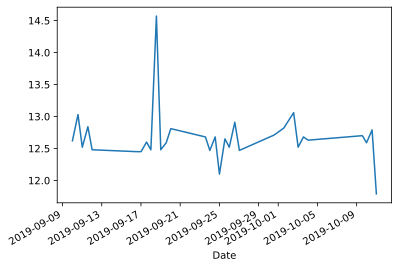

In [209]:
df['Distance'].plot.line()

- Cumulative distance might be more informative

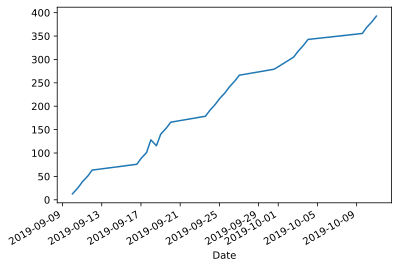

In [210]:
df['Distance'].cumsum().plot.line();

- There are many configuration options for these plots whic build of `matplotlib`, which you'll learn in DSCI 531

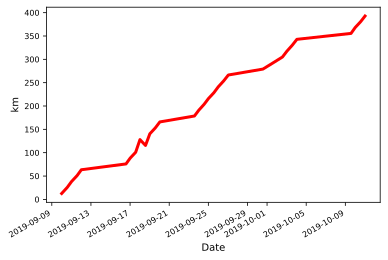

In [212]:
df['Distance'].cumsum().plot.line(fontsize=8, linewidth=3, color='r', ylabel='km');

- There are many other kinds of plots you can make too:

|Method|Plot Type|
|---|---|
|`bar` or `barh` | bar plots|
|`hist` | histogram|
|`box` | boxplot|
|`kde` or `density` | density plots|
|`area` | area plots|
|`scatter` | scatter plots|
|`hexbin` | hexagonal bin plots|
|`pie` | pie plots|

### Pandas plotting

- Pandas also supports a few more advanced plotting functions in the `pandas.plotting` module
- You can view them in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools) and we'll revisit them in DSCI 574

In [213]:
from pandas.plotting import scatter_matrix

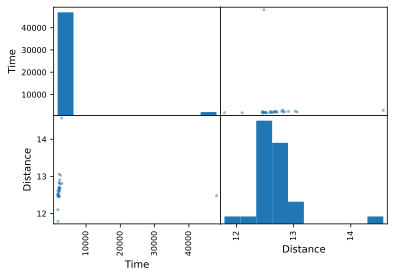

In [214]:
scatter_matrix(df);

- We have an outlier time in the data above, a time value of ~48,000
- Let's remove it and re-plot

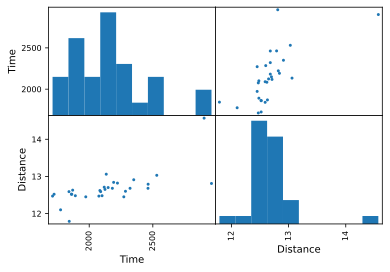

In [215]:
scatter_matrix(df.query('Time < 4000'), alpha=1);

## Pandas profiling

- Great tool for generating summary reports and doing exploratory data analysis on dataframes
- [Pandas profiling](https://github.com/pandas-profiling/pandas-profiling) is not part of base Pandas
- You can install with: 

```
conda install -c conda-forge pandas-profiling
```
or
```
pip install pandas-profiling[notebook]
```

In [217]:
from pandas_profiling import ProfileReport
df = pd.read_csv('data/imdb.csv')
df.profile_report(progress_bar=False)